In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
titanic=sns.load_dataset('titanic')

In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic.shape

(891, 15)

In [9]:
#Data Preprocessing
#Missing values
titanic.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [10]:
#age
print(714/819)#checking how much % is the dataless than 25% missing values so check for outliers and decide whether to take mean or median

0.8717948717948718


<AxesSubplot:ylabel='age'>

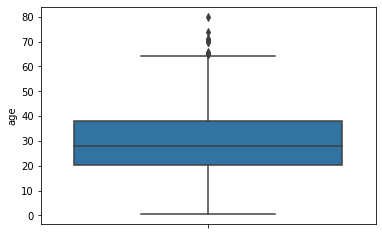

In [11]:
#boxplot
sns.boxplot(y='age',data=titanic)

In [12]:
#outleirs there so go for median
titanic['age']=titanic['age'].fillna(titanic['age'].median())

In [13]:
titanic.isnull().any()

survived       False
pclass         False
sex            False
age            False
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [14]:
#Deck
print(203/891)#missing values more than 25% so drop it

0.22783389450056116


In [15]:
titanic=titanic.drop(['deck'],axis=1)

In [16]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [17]:
titanic.isnull().any()

survived       False
pclass         False
sex            False
age            False
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
embark_town     True
alive          False
alone          False
dtype: bool

In [18]:
#Embarked and Embark_town both are same so we can drop one 
titanic=titanic.drop(['embark_town'],axis=1)

In [19]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True


In [20]:
#Embarked is an object so we have to take mode to handle missing values
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [21]:
#maximum S so fill missing values with 'S'
titanic['embarked']=titanic['embarked'].fillna('S')

In [22]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True


In [23]:
titanic.isnull().any()

survived      False
pclass        False
sex           False
age           False
sibsp         False
parch         False
fare          False
embarked      False
class         False
who           False
adult_male    False
alive         False
alone         False
dtype: bool

In [24]:
titanic.describe(include='O')#Survived and alive is same so drop one so before that we need to check for object varaibles

,sex,embarked,who,alive
count,891,891,891,891
unique,2,3,3,2
top,male,S,man,no
freq,577,646,537,549


In [25]:
#Above is showSing survived and alive are the same as unique values in alive is just 2 which means 0 in survived is no in alive amd 1 in survived is yes in alive-So we can drop one
#Also who and sex are not same because in sex only two unique values(female and male) and in who 3 unique values(man,woman and child)-dont drop



In [26]:
#Class and pclass same so drop one
#colums sibsp,parch, alone are related if sibsp=0 and parch=0 it means alone if anyone is 1 it means not alone so we can drop alone column
#adult_male also we can drop as sex and age indicates male and adult iand drop 'who' also as age and sex indicate male ,femal or child.
#fare is nonsignificant variable to predict survived or not
titanic=titanic.drop(['alive','pclass','alone','adult_male','who','fare'],axis=1)

In [27]:
titanic.head()

,survived,sex,age,sibsp,parch,embarked,class
0,0,male,22.0,1,0,S,Third
1,1,female,38.0,1,0,C,First
2,1,female,26.0,0,0,S,Third
3,1,female,35.0,1,0,S,First
4,0,male,35.0,0,0,S,Third


In [28]:
#Encoding
#Label Encoding
titanic['sex']=titanic['sex'].astype('category')
titanic['sex']=titanic['sex'].cat.codes

In [29]:
titanic['embarked']=titanic['embarked'].astype('category')
titanic['embarked']=titanic['embarked'].cat.codes

In [30]:
titanic['class']=titanic['class'].astype('category')
titanic['class']=titanic['class'].cat.codes

In [31]:
#One Hot Encoding
titanic=pd.get_dummies(titanic,columns=['sex'])
titanic=pd.get_dummies(titanic,columns=['embarked'])
titanic=pd.get_dummies(titanic,columns=['class'])

In [32]:
titanic.head()

,survived,age,sibsp,parch,sex_0,sex_1,embarked_0,embarked_1,embarked_2,class_0,class_1,class_2
0,0,22.0,1,0,0,1,0,0,1,0,0,1
1,1,38.0,1,0,1,0,1,0,0,1,0,0
2,1,26.0,0,0,1,0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,0,0,1,1,0,0
4,0,35.0,0,0,0,1,0,0,1,0,0,1


In [33]:
#Dummy 
titanic=titanic.drop(['sex_0','embarked_0','class_0'],axis=1)

In [34]:
titanic.head()

,survived,age,sibsp,parch,sex_1,embarked_1,embarked_2,class_1,class_2
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,1,0,0
4,0,35.0,0,0,1,0,1,0,1


In [35]:
#No need of outlier treatment in lolgistic regression,simply checking the numeric variable here which is age have minimum and maximum value  is within 100
titanic['age'].describe()


count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [36]:
#Yes it is

In [37]:
#Feature scaling is also not needed as every variable is a binary value exceot age and age also every values are within 100

In [38]:
#Imbalance dataset
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [39]:
2*342>549 # so there is no imbalance

True

In [40]:
#Splitting data into dependent and independent
x=titanic.iloc[:,1:]

In [41]:
y=titanic.iloc[:,0]

In [42]:
x.head()

,age,sibsp,parch,sex_1,embarked_1,embarked_2,class_1,class_2
0,22.0,1,0,1,0,1,0,1
1,38.0,1,0,0,0,0,0,0
2,26.0,0,0,0,0,1,0,1
3,35.0,1,0,0,0,1,0,0
4,35.0,0,0,1,0,1,0,1


In [43]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [44]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=101)

In [45]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(668, 8)
(668,)
(223, 8)
(223,)


# Building Logistic Regression Model


In [46]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)

LogisticRegression()

In [47]:
y_pred=logit_model.predict(x_test)#predicting with y_test

In [48]:
y_pred_train=logit_model.predict(x_train)#predicting with y_train

In [49]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0], dtype=int64)

In [50]:
y_test

331    0
700    1
748    0
751    1
481    0
      ..
837    0
367    1
501    0
183    1
475    0
Name: survived, Length: 223, dtype: int64

In [51]:
#Checking the accuracy 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))

[[113  14]
 [ 35  61]]


In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       127
           1       0.81      0.64      0.71        96

    accuracy                           0.78       223
   macro avg       0.79      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223



In [53]:
print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_train,y_pred_train))

0.7802690582959642
0.8143712574850299


In [54]:
#ROC-AUC curve
from sklearn.metrics import roc_auc_score
logistic_roc_auc=roc_auc_score(y_test,y_pred)
logistic_roc_auc

0.7625902230971128

In [55]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)
display(fpr[:10])
display(tpr[:10])
display(threshold[:10])

array([0.        , 0.11023622, 1.        ])

array([0.        , 0.63541667, 1.        ])

array([2, 1, 0], dtype=int64)

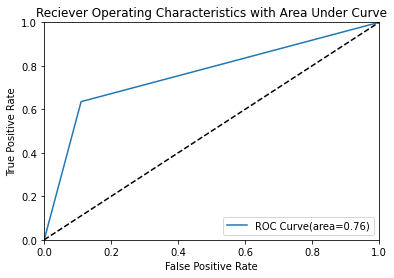

In [58]:
#plotting ROC_AUC curve
plt.figure()
plt.plot(fpr,tpr,label= "ROC Curve(area=%0.2f)" % logistic_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Reciever Operating Characteristics with Area Under Curve")
plt.legend(loc='lower right')


# Decision Tree Model

In [77]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier(criterion='gini')
dt2=DecisionTreeClassifier(criterion='entropy')
dt1.fit(x_train,y_train)
dt2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [80]:
y_pred_dt1_test=dt1.predict(x_test)#training with test with gini
y_pred_dt1_train=dt1.predict(x_train)#training withtrain with gini

y_pred_dt2_test=dt2.predict(x_test)#training withtest with entropy
y_pred_dt2_train=dt2.predict(x_train)#training with train data with entropy

In [81]:
print(accuracy_score(y_train,y_pred_dt1_train))
print(accuracy_score(y_test,y_pred_dt1_test))

print(accuracy_score(y_train,y_pred_dt2_train))
print(accuracy_score(y_test,y_pred_dt2_test))

0.9461077844311377
0.757847533632287
0.9461077844311377
0.7533632286995515


In [ ]:
#variance is high so overfit model#so here logistic is better as accuracy dont have variance
#gini result i giving better results

In [ ]:
#We can go for RF

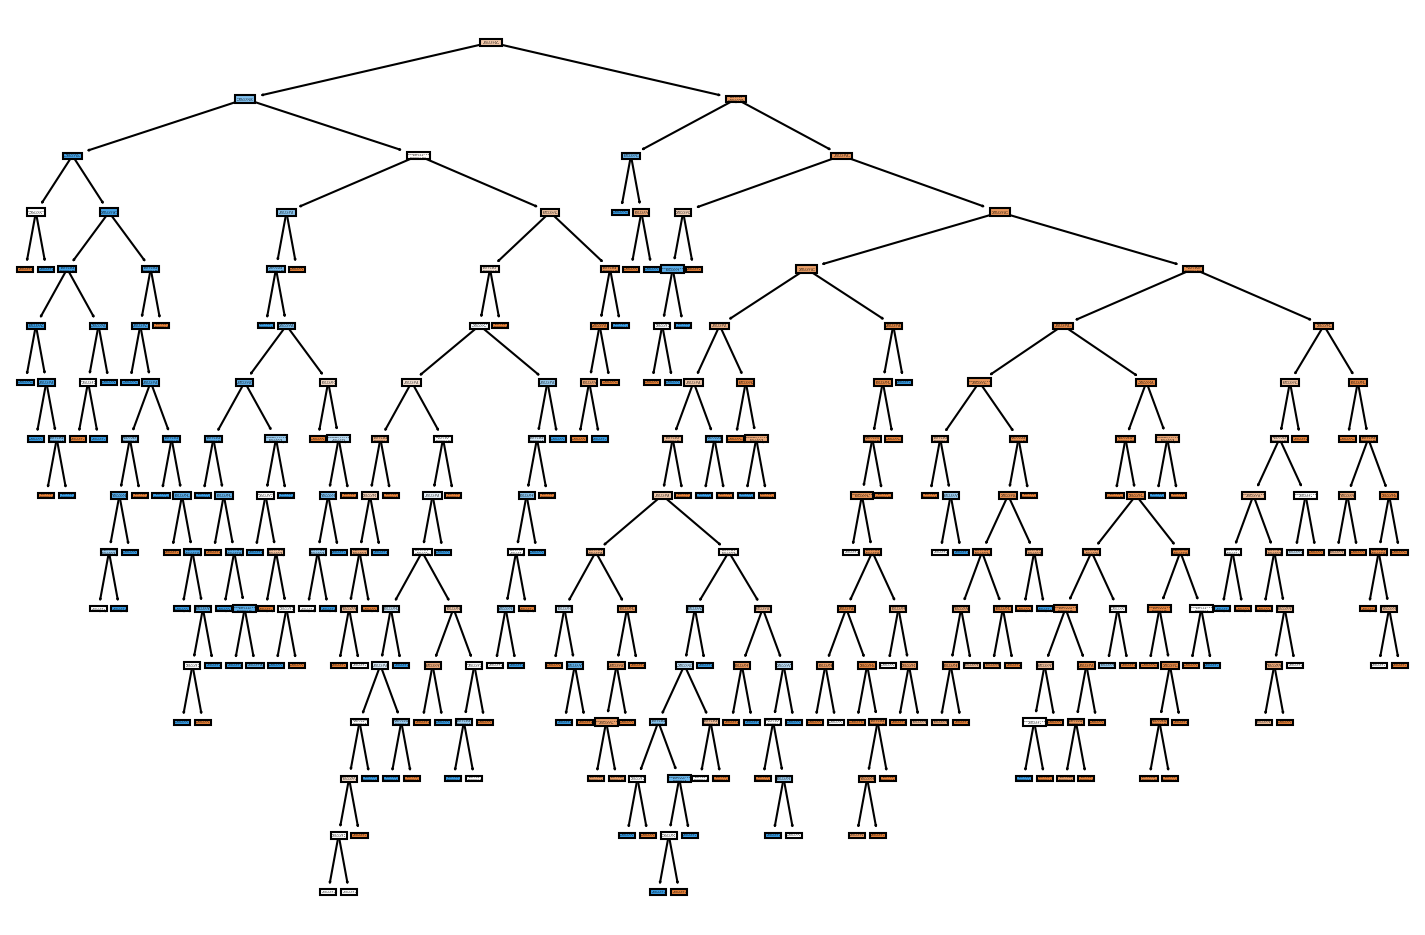

In [92]:
#Visualization as a tree
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dt1,filled=True,feature_names=x.columns)
plt.show()